# Part I - (Ford Gobike  Dataset)
## by (Gideon Oba)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#faults">Quality Issues Discovered</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Project Limitation</a></li> 
<li><a href="#ref">References</a></li>
</ul>


<a id='intro'></a>
## Introduction
This data set includes information about 183,400 individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
The data set contains information regarding:
+ Duration – Duration of trip
+ Start Date – Includes start date and time
+ End Date – Includes end date and time
+ Start Station – Includes starting station name and number
+ End Station – Includes ending station name and number
+ Bike Number – Includes ID number of bike used for the trip
+ Member Type – Indicates whether user was a "registered" member  or a "casual" rider.
+ Start and End Coordinates - Includes the longitude and latitude of each start and end station.
+ Bike id.

From a similar dataset website [Capital Bikeshare](https://ride.capitalbikeshare.com/system-data) these are some question posed about the bike sharing system.

+ Which stations are most popular?
+ What days of the week are most rides taken on?
+ How long does the average trip take?

These Project would try to answer these questions and more.

In [1]:
# Packeages for Data Wrangling and Analysis
import pandas as pd
import numpy as np

# Packages for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Package for working with dates and times
import datetime as dt

# Package for accessing files on local device from the Jupyter Notebook
import os

# Package for visualization of maps
# pip install folium to access this module
import folium
from folium import plugins

In [2]:
# Loads the dataset into a DataFrame
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
print('gobike shape:', gobike.shape, end='\n\n')
gobike.head()

gobike shape: (183412, 16)



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Summary info of the DataFrame
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Checks the percentage of missing data in the data set
missing_data = gobike.isnull().sum()* 100/gobike.shape[0]
missing_data[missing_data > 0].map(lambda x: '{:.2f}%'.format(x))

start_station_id      0.11%
start_station_name    0.11%
end_station_id        0.11%
end_station_name      0.11%
member_birth_year     4.51%
member_gender         4.51%
dtype: object

In [5]:
# descriptive statistics for numeric variables
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<a id="faults"></a>
## Quality Issues Discovered

These are some of the quality issues discovered when exploring the `gobike_clean` data set:
1. `start_time` and `end_time` data type are formatted as an object.
2. `start_station_id`, `start_station_name`, `end_station_id`, and `end_station_name` have 0.11 percent data missing.
3. `gobike_clean` table: `member_birth_year` has 4.51 percent  data missing.
4. `member_gender` has 4.51 percent  data missing.
5. `gobike_clean` table: `member_birth_year` has either outliers or incorrect data.


<a id="cleaning"></a>
## Data Cleaning

In [6]:
# Creates a copy of the original dataset
gobike_clean = gobike.copy()
gobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### 1. `gobike_clean` table: `start_time` and `end_time` data type are formatted as an object

Convert the `start_time` and `end_time` form an object data type to datatime data type using the pandas method `pd.to_datetime`.

In [7]:
gobike_clean['start_time'] = pd.to_datetime(gobike_clean['start_time'])
gobike_clean['end_time'] = pd.to_datetime(gobike_clean['end_time'])
gobike_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

After converting the columns `start_time` and `end_time` to date time data type, I want to check if the values in column `duration_sec` are correct with the difference between the `end_time` and `start_time`.
```
delta_time = gobike_clean['end_time'] - gobike_clean['start_time']
compare = (gobike_clean['duration_sec'] != delta_time.seconds)
```

In [8]:
def time_checker(dataframe):
    """
    Check dataframe column `duration_sec` for correct values.
    
    This function simply checks if `duration_sec` is equal to the extract duration in seconds
    between the `end_time` and `start_time`.
    
    Parameters
    ----------
    dataframe : DataFrame
        Pandas DataFrame having `end_time` and `start_time` as a date time data type.
        
    Returns
    -------
    affrim : bool
    """
    boolean_list = []
    affrim = np.array(boolean_list).any()
    for i, row in dataframe.iterrows():
        delta_time = row['end_time'] - row['start_time']
        check = row['duration_sec'] != delta_time.seconds
        boolean_list.append(check)
    return affrim
time_checker(gobike_clean)

False

#### Report
Using the custom function `time_checker` the data in `duration_sec` is accurate.

### 2. `gobike_clean` table: `start_station_id`, `start_station_name`, `end_station_id`, and `end_station_name` have 0.11 percent data missing.
 

In [9]:
station_missing = gobike_clean[gobike_clean['start_station_id'].isnull()]
station_missing.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes


In [10]:
station_missing.isnull().sum()[station_missing.isnull().sum()>0]

start_station_id      197
start_station_name    197
end_station_id        197
end_station_name      197
member_birth_year       2
member_gender           2
dtype: int64

In [11]:
gobike_clean[gobike_clean['start_station_id'].isnull()].shape

(197, 16)

In [12]:
gobike_clean.dropna(subset=['start_station_id'], inplace=True)

In [13]:
gobike_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

### 3. `gobike_clean` table: `member_birth_year` has 4.51 percent  data missing

From the summary statistics of the DataFrame `member_birth_year` has **mean** and **median** of **1984** and **1987**, i'll be using the median as replacement for the missing data since the data is slightly skew to the left.

In [14]:
gobike_clean['member_birth_year'].agg(['mean', 'median'])

mean      1984.803135
median    1987.000000
Name: member_birth_year, dtype: float64

In [15]:
gobike_clean['member_birth_year'].isnull().sum()

8263

In [16]:
# Replace missing values with the median `member_birth_year`
gobike_clean['member_birth_year'].fillna(gobike_clean['member_birth_year'].median(), inplace=True)

#### Test:

In [17]:
gobike_clean['member_birth_year'].isnull().sum()

0

### 4. `gobike_clean` table: `member_gender` has 4.51 percent  data missing.

In [18]:
gobike_clean['member_gender'].value_counts(dropna=False)

Male      130500
Female     40805
NaN         8263
Other       3647
Name: member_gender, dtype: int64

The decision to drop or replace the data is quite challenging since:
1. Missing values can be a proption of either male or female users.
2. The Unique value `Other` might represent users that might not identify as either Male or Female, or might have made the decision not to answer the question.
I made the decision to include the missing data as `Other`.

In [19]:
# Replace missing values with `member_gender` Other.
gobike_clean['member_gender'].fillna('Other', inplace=True)

#### Test:

In [20]:
gobike_clean['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

### 5. `gobike_clean` table: `member_birth_year` has either outliers or incorrect data.

`member_birth_year` clearly has outliers or incorrect data since the minimum birth year is about 141 years old during 2019.

In [21]:
gobike_clean['member_birth_year'].agg(['min', 'max'])

min    1878.0
max    2001.0
Name: member_birth_year, dtype: float64

I'll take care of the outliers when performing feature engineering on the `member_birth_year` column.

<a id="eda"></a>
## Exploratory Data Analysis


### Visualizaton of Quantative columns in the `gobike_clean` dataset

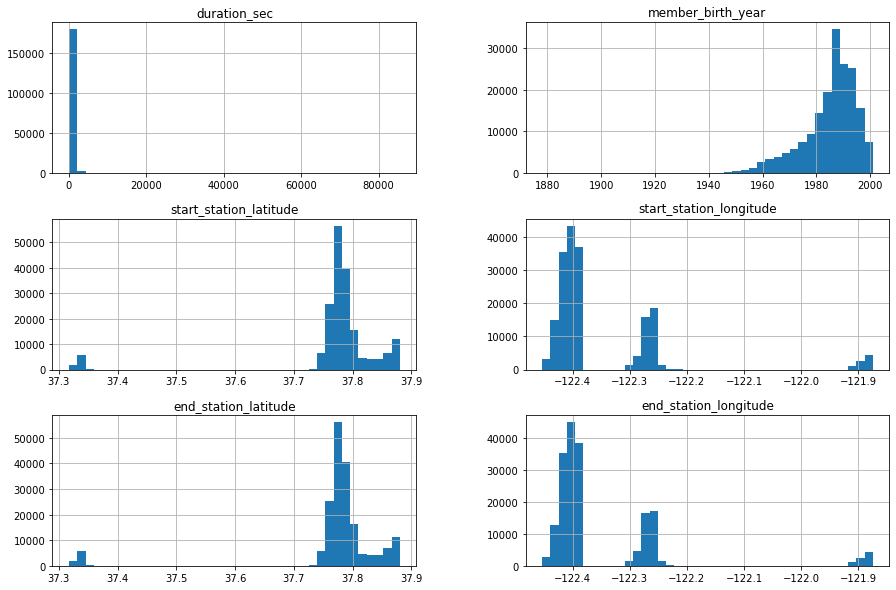

In [22]:
# Plot of some numeric columns
gobike_clean[[
    'duration_sec','member_birth_year',
    'start_station_latitude','start_station_longitude',
    'end_station_latitude','end_station_longitude'
]].hist(bins=40, figsize=(15,10));

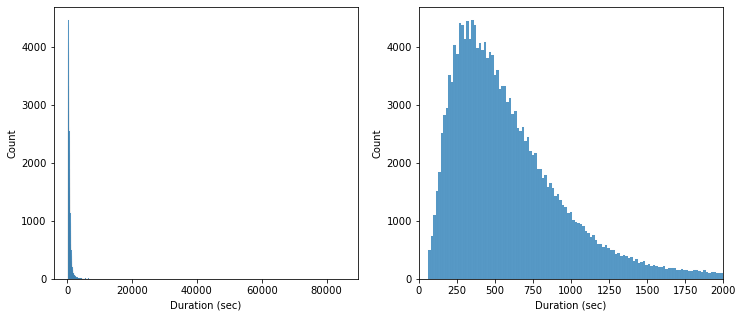

In [23]:
plt.rcParams['figure.figsize'] = 12, 5

fig, ax = plt.subplots(1,2)
d = sns.histplot(data=gobike_clean, x='duration_sec', ax=ax[0])
d.set_xlabel("Duration (sec)");
d.set_ylabel("Count")

v = sns.histplot(data=gobike_clean, x='duration_sec', ax=ax[1])
v.set_xlabel('Duration (sec)')
v.set_ylabel('Count')
plt.xlim(0,2000);

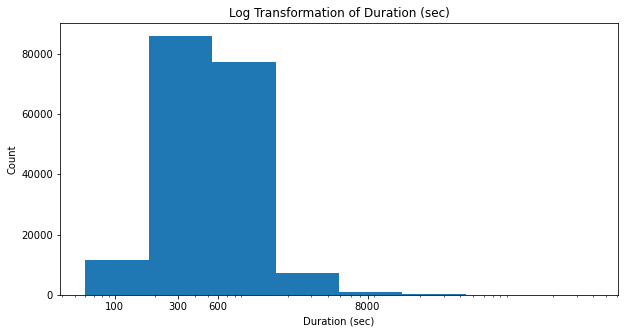

In [24]:
bin_step = np.log10(3)
bin_edges = 10 ** np.arange(1.78, 4.9+1, bin_step)
plt.figure(figsize =(10,5))
plt.hist(data=gobike_clean, x='duration_sec', bins=bin_edges)
plt.xscale('log')
plt.xticks([100, 300, 600, 8000],['100', '300', '600', '8000'])
plt.ylabel('Count')
plt.xlabel('Duration (sec)')
plt.title('Log Transformation of Duration (sec)');

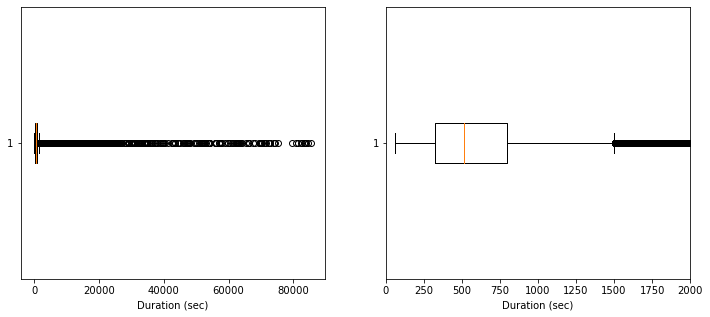

In [25]:
plt.rcParams['figure.figsize'] = 12, 5

plt.subplot(1, 2, 1)
plt.boxplot(data=gobike_clean, x='duration_sec', vert=False)
plt.xlabel('Duration (sec)')

plt.subplot(1, 2, 2)
plt.boxplot(data=gobike_clean, x='duration_sec', vert=False)
plt.xlim(0,2000)
plt.xlabel('Duration (sec)');

From the histogram visualization of the selected columns it is noted that columns:
1. `duration_sec`:
    + Appears to be very skewed to the right.
    + Majority of the recorded observation have a bicycle ride duration between 0 to 1500 seconds.
2. `member_birth_year`:
    + Majority of riders are born either in 80's or 90's.
    + The Minimum and Maximum year of birth of the riders are 1878 and 2001. 
    + But it is noted that `member_birth_year` clearly has outliers or false data, since we can not have somebody born 1878 having the strength to ride a bike in 2019, he or she would be about  141 years old.
3. `start_station_longitude` and `end_station_longitude`: From the histogram it's noted that the longitude plotted has 3 distinct distribution. These distinct distribution might indicate that our data contains 3 distinct location concentration, meaning that stations in the data set might be located in 3 different settlement.
4. `start_station_latitude` and `end_station_latitude`: For the distribution of latitude it's noted that there are 2 distinct distribution. These might indicate that 2 out of the 3 settlements might be closer to each other. 

## Feature Engineering

I'll create some new columns that will be used to discover features that are closly related.
First a column i'll create contains the days of the week, this  is done by formating the datatime object to day of the week. 

In [26]:
gobike_clean['day_of_week'] = gobike_clean['start_time'].dt.strftime('%A')
gobike_clean['day_of_week'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

Next, a column containing the period of day each riders starts there ride is created. 

In [27]:
def period_of_day(x):
    """
    Create Period of day
    
    The Period of day is the grouping of the 24 hour clock into 6 unique periods. The period of the day are
    late night, early morning, morning, noon, evening, and night.
    
    Parameters
    ----------
    x : pd.Series.datetime.datetime
        Pandas Series containing datetime data type.
        
    Returns
    -------
    output : {Late Night, Early Morning, Morning, Noon, Evening, Night}
    """
    hour = x.hour
    period = hour // 4
    period_hour = {
        0:'Late Night', 1:'Early Morning',
        2:'Morning', 3:'Noon',
        4:'Evening', 5:'Night'
    }
    output = period_hour[period]
    return output

In [28]:
# Create new feature `period_of_day` when the function `period_of_day` is applied to the Pandas Series `start_time`
gobike_clean['period_of_day'] = gobike_clean['start_time'].apply(period_of_day)
gobike_clean['period_of_day'].unique()

array(['Evening', 'Noon', 'Night', 'Morning', 'Late Night',
       'Early Morning'], dtype=object)

In [29]:
# Convert day_of_week, and period_of_day into ordered categorical types
ordinal_var_dict = {'day_of_week':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'period_of_day':['Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = ordinal_var_dict[var])
    gobike_clean[var] = gobike_clean[var].astype(ordered_var)

#### Test:

In [30]:
print(gobike_clean['period_of_day'].unique(), end='\n\n')
print(gobike_clean['day_of_week'].unique())

['Evening', 'Noon', 'Night', 'Morning', 'Late Night', 'Early Morning']
Categories (6, object): ['Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night' < 'Late Night']

['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']


I'll create two columns containing the hour of day in which each rider starts and ends there ride.

In [31]:
# Create two new columns `Hour_of_day_start` and `Hour_of_day_end`
gobike_clean['Hour_of_day_start'] = gobike_clean['start_time'].dt.hour
gobike_clean['Hour_of_day_end'] = gobike_clean['end_time'].dt.hour

In [32]:
gobike_clean['end_time'].agg(['min', 'max'])

min   2019-02-01 00:04:52.058
max   2019-03-01 08:01:55.975
Name: end_time, dtype: datetime64[ns]

From the code above we can see that the minimum and maximum end time for bike riders falls within the year 2019. Therefore, we can create a new column called `Age`, which caputures the riders age by subtracting 2019 from `member_birth_year`. 

In [33]:
# Create columns called `Age`
gobike_clean['Age'] = 2019 - gobike_clean['member_birth_year']

In [34]:
gobike_clean['Age'].agg(['max', 'min'])

max    141.0
min     18.0
Name: Age, dtype: float64

Since both `member_birth_year` and `Age` are skew to the left. I decided to create a new column that captures the age groups. According to the [Statistics of Canada](https://www.statcan.gc.ca/en/concepts/definitions/age2) age groups or Categories can be broken down into:
1. Children (00-14 years).
2. Youth (15-24 years).
3. Adults (25-64 years).
4. Seniors (65 years and over).

For my project i decided to capture the age range of 25 to 59 years as adults, and age range 60 and over as seniors.

In [35]:
# Create bins (18, 24] as Youth, (24, 60] as Adult, and (60, 141] as Seniors
bins = [18, 24, 60, 141]
labels = ['Youth', 'Adult', 'Seniors']
gobike_clean['Age_class'] = pd.cut(gobike_clean['Age'], bins=bins, labels=labels, include_lowest=True)

In [36]:
gobike_clean['Age_class'].value_counts()

Adult      156731
Youth       22954
Seniors      3530
Name: Age_class, dtype: int64

#### Test:

In [37]:
gobike_clean[['Hour_of_day_start', 'Hour_of_day_end', 'Age', 'Age_class','period_of_day']].head()

,Hour_of_day_start,Hour_of_day_end,Age,Age_class,period_of_day
0,17,8,35.0,Adult,Evening
1,18,6,32.0,Adult,Evening
2,12,5,47.0,Adult,Noon
3,17,4,30.0,Adult,Evening
4,23,0,45.0,Adult,Night


In [38]:
gobike_clean['period_of_day'].unique()

['Evening', 'Noon', 'Night', 'Morning', 'Late Night', 'Early Morning']
Categories (6, object): ['Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night' < 'Late Night']

## Data Analysis

1. What is the percentage of riders that are customers and Subscribers?
2. Which gender type is most common among riders?.
3. What is the percentage of riders that share bike?
4. When are most trips taken in terms of time of day, period of the day, day of the week?
5. Which Age group is the most common among riders?
6. How long does the average trip take?
7. Does the average trip taken depend on if a user is a subscriber or customer?
8. Which stations are most popular?
9. At what point do we need to check or service bike in the sharing system?
10. Heatmap visualization of each cooridinate of bike stations?

### 1. What is the percentage of riders that are customers and Subscribers?

In [39]:
def pie_plot(col_name, title, color=['#157fa1','#a4daeb']):
    """
    Create pie plot.
    
    Parameters
    ----------
    col_name : str
        Takes in a string containing the name of the column in a DataFrame to be plotted.
    title : str
        Takes in a string containing the title of the plot.
    color : str
        Takes a string corespounding to the valid colors given in Matplotlib libary.
    """
    plt.figure(figsize=[8,8])
    sort_count = gobike_clean[col_name].value_counts()
    plt.pie(sort_count, labels=sort_count.index,autopct="%.1f%%", 
            pctdistance=0.77, startangle=90, 
            counterclock=False, wedgeprops={'width': 0.4},
           textprops={'fontsize': 12, 'family':'cursive','va':'baseline'}, colors=color)
    plt.title(title, fontdict={'fontsize': 14});

Why is finding the percentage of user type important, This is because it indicates whether users are "registered" member or a "casual" rider.
The user type column has two unique values which are:
1. Subscriber: These are registered members.
2. Customer: These are casual riders.

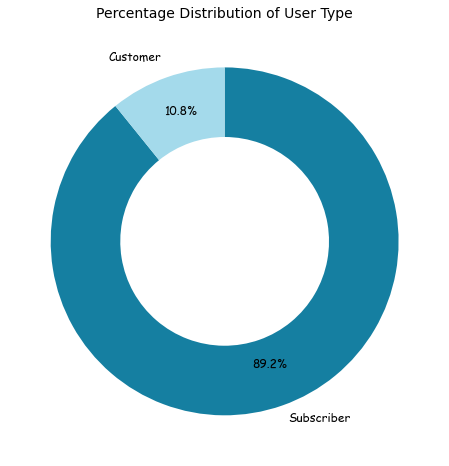

In [40]:
pie_plot('user_type', title="Percentage Distribution of User Type")

#### Report:

From the plot above we can see that Subsribers make up the majority of the dataset with 89.2%, while customers make up 10.8% of the data. Therefore, we can say that majority of riders are registered. To illustrate 17 out of 20 riders are registered members.

### 2. Which gender type is most common among riders?.

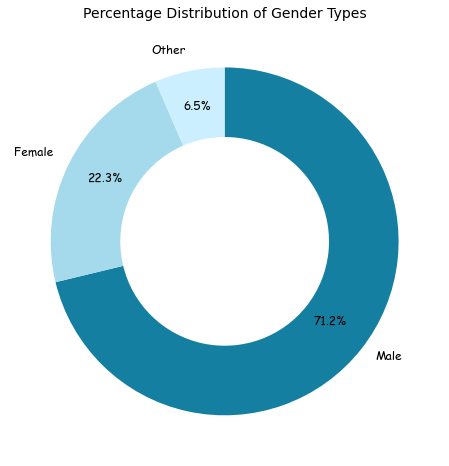

In [41]:
pie_plot('member_gender', title="Percentage Distribution of Gender Types", color=['#157fa1','#a4daeb', '#ccefff'])

#### Report
I was expecting an even distribution of male and female riders, but from the visualization of the data, we can see that male riders make up 71.2% of the entire data set. These means that out of every 10 riders about 7 are male, 2 are female, and 1 is other. Since Men form the majority of riders in the data set, does this mean that they also ride on an average longer time duration then Women and Others?.

### 3. What is the percentage of riders that share bike?

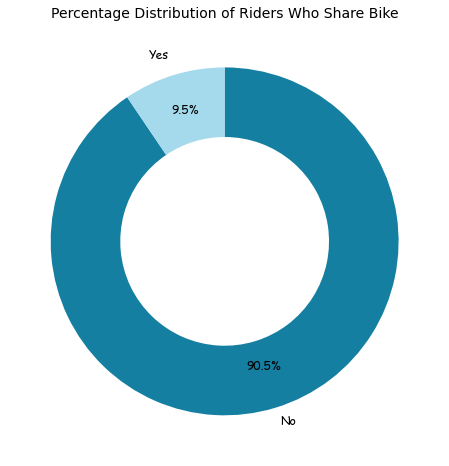

In [42]:
pie_plot('bike_share_for_all_trip', title="Percentage Distribution of Riders Who Share Bike")

#### Report
From the pie plot we can see that majority of the dataset with about 90.5% of riders do not share bike, while the manority of 9.5% share bikes. This raises the question are customers allowed to share bikes, or is the right to share bike only given to subcribers?. We have already seen that majority of the data set are Subcribers so does that also influence the result here?.

### 4. When are most trips taken in terms of time of day, period of day, and day of the week?

In [43]:
def bar_plot(col, xlabel, title, ylabel='Count', figsize=(12,5), text_fontsize=11):
    """
    Create Bar Plot.
    
    Parameters
    ----------
    col : str
        Column name from the dataset.
    xlabel : str
        Label of the x axis.
    ylabel : str default {Count}
        Label of the y axis.
    figsize : tuple of (int, int)
        The size of the x and y axis of the plot.
    text_fontsize : int
       The text font size.  
    """
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['figure.figsize'] = figsize
    sns.countplot(data=gobike_clean, x=col, color='#267ea3')
    loc_y,labels_y = plt.yticks()
    y_labels = ["{:,}".format(round(loc)) for loc in loc_y]
    plt.yticks(loc_y, y_labels, fontfamily='cursive', fontsize=11)
    plt.xticks(fontfamily='cursive', fontsize=11)
    loc_x, labels_x = plt.xticks()
    type_count = gobike_clean[col].value_counts()
    
    for loc, label in zip(loc_x, labels_x):
        index = label.get_text()
        confirm = type_count.index[0]
        if type(confirm) == str:
            value = type_count[index]
            total = type_count.sum()
            text_str = "{:.2f}%".format(value*100 / total)
            plt.text(loc, value+1000, text_str,
                     fontfamily='cursive', ha='center', 
                     fontsize=text_fontsize,
                     fontweight='semibold')
        else:
            index = int(index)
            value = type_count[index]
            total = type_count.sum()
            text_str = "{:.2f}%".format(value*100 / total)
            plt.text(loc, value+1000, text_str, 
                     fontfamily='cursive', ha='center', 
                     fontsize=text_fontsize, fontweight='semibold')
            
    plt.ylabel(ylabel, fontdict={'fontsize': 11})
    plt.xlabel(xlabel, fontdict={'fontsize': 11})
    plt.title(title, fontdict={'fontsize': 14, 'fontweight':'roman'});

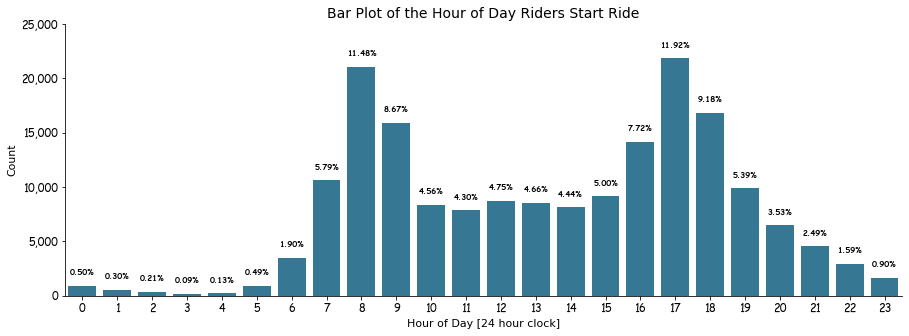

In [44]:
bar_plot('Hour_of_day_start', xlabel='Hour of Day [24 hour clock]', 
         title='Bar Plot of the Hour of Day Riders Start Ride', 
         figsize=(15,5),text_fontsize=8)

#### Report
From the plot above we can see that the hour most riders start there riders is at 5pm with 11.92%, and closely followed by 8 am with 11.48%. Close to this two peak times come the 3rd, 4th, 5th, and 6th highest hours in which riders are more like to start a ride. The least time in which riders take a bike ride are at the late hours of the night. 

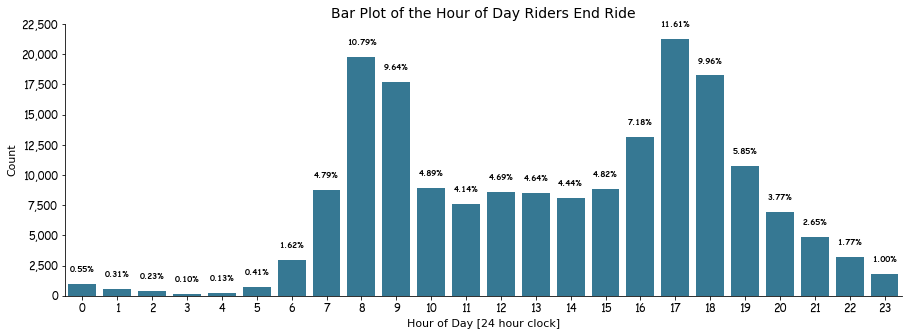

In [45]:
bar_plot('Hour_of_day_end', xlabel='Hour of Day [24 hour clock]', 
         title='Bar Plot of the Hour of Day Riders End Ride', 
         figsize=(15,5),text_fontsize=8)

#### Report
The bar plot of the hour of the day riders end there ride looks similar to the bar plot of the hour riders start there ride with only minor differences. What does this mean?. These might have resulted because of the short duration of time in which riders start and end there ride.

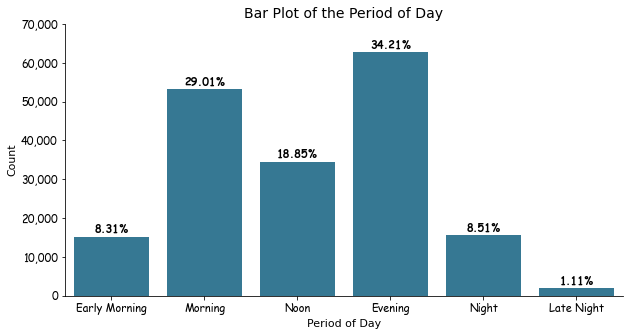

In [46]:
bar_plot('period_of_day', xlabel='Period of Day', title='Bar Plot of the Period of Day', figsize=(10,5))

#### Report 
I'm not suprised that late nights have the least representation in the data set with 1.11%, most bike riders would be at sleep by this time. But from the visualization the highest bike riders count falls in the evening with 34.21%, next is morning with 29.01%. At these times we expect that most bikes would be in use and common paths taken during riders would be in active use. Also people who work 9 am to 5 pm jobs would more likely take ride early in the morning before work and during the evening after work, These would only account for working days.


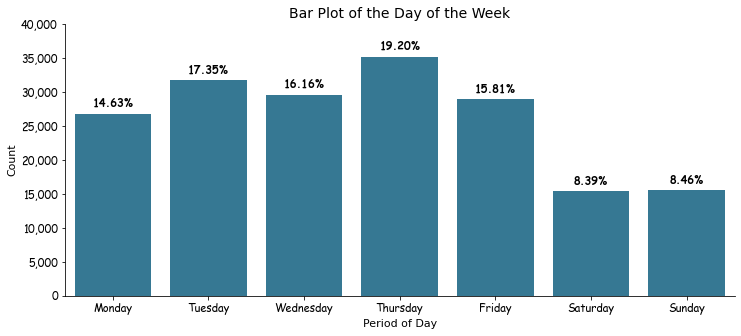

In [47]:
bar_plot(col='day_of_week', xlabel='Period of Day', title='Bar Plot of the Day of the Week')

#### Report 
The output of these plot is not what i expected, I expected that at the begining of the week like Monday would have the least number of ride count, and that the end of the week like Saturday and Sunday would have the most ride count. From the bar plot of the day of the week we can see that Thursday and Tuesday have the most number of rider counts, while the end of the week like Saturday and Sunday have the least ride count with an average of 8.42%. So we can make the assumption that most people take rides during working days.

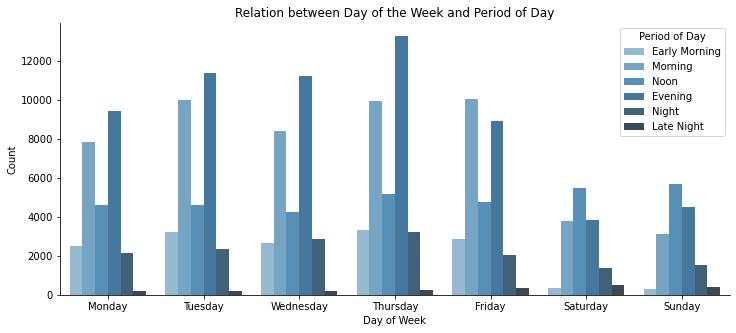

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(data=gobike_clean, x='day_of_week', hue='period_of_day', palette='Blues_d')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Period of Day')
plt.title('Relation between Day of the Week and Period of Day');

#### Report 
I went futher to explore the relationship between the period of day and day of the week. This what i discovered, I saw similar trend starting from Monday to Friday, were the 1st and 2nd highest counts are in the Evening and Morning and the 3rd is at Noon just as we saw in the visualization of Period of Day. But when it comes to the week end Saturday and Sunday, the trend changes as majority of rides start at Noon. I have an assumtion that the trends we see at the end of the week might be  because people tend to sleep or wake up late at the end of week.

### 5. Which Age group is the most common among riders?

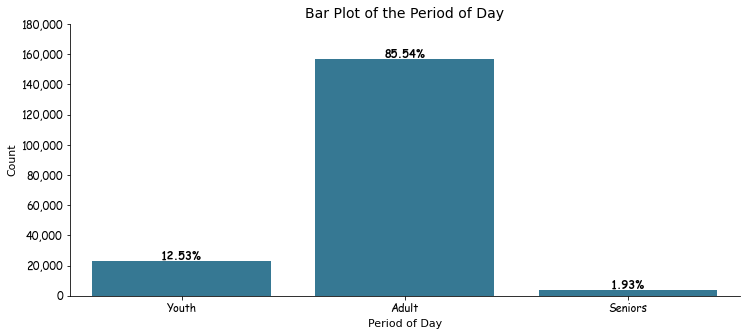

In [49]:
bar_plot(col='Age_class', xlabel='Period of Day', title='Bar Plot of the Period of Day')

#### Report 
I expected that Adult would make the majority of the data set. From the visualization youths made up 12.5% of the data, Adults made 85.54% of the data, and Seniors made 1.93% of the data set. These means Majority of our data set are Adults and Seniors from age 60 and above only make 1.93%. What might have influence the results we visualizied?, Well i think that the energy levels of Adults and Youth far exceed that of Seniors, Another reason would be hidden in population density of people living in greater San Francisco Bay areas.

### 6. How long does the average trip take?
To answer this question we would divide the question to sub groups. How long does the average trip take for:
 + all riders?
 + customers and subscribes?
 + the different member gender?
 + different age class?
 + for those who share bike for all trip?
 

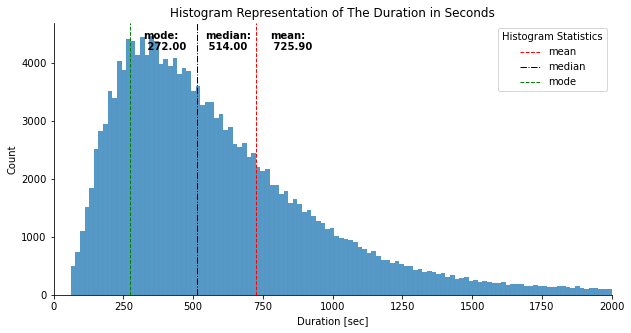

In [50]:
mean_duration = gobike_clean['duration_sec'].mean()
median_duration = gobike_clean['duration_sec'].median()
mode_duration = gobike_clean['duration_sec'].mode().values[0]
plt.figure(figsize=[10,5])
sns.histplot(data=gobike_clean, x='duration_sec')
plt.xlim(0, 2000)
plt.axvline(mean_duration, color='r', linestyle='--', linewidth=1, label='mean')
plt.axvline(median_duration, color='black', linestyle='-.', linewidth=1, label='median')
plt.axvline(mode_duration, color='green', linestyle='--', linewidth=1, label='mode')
plt.legend(title='Histogram Statistics')
min_lim_y, max_lim_y = plt.ylim()
labels =['mean','median','mode']
x_location = [mean_duration, median_duration, mode_duration]
position = [50, 30, 50]
for label , loc, position in zip(labels, x_location, position):
    plt.text(loc+position, max_lim_y*0.9, '{0}:\n {1:.2f}'.format(label, loc), fontweight='semibold')
plt.xlabel('Duration [sec]')
plt.title('Histogram Representation of The Duration in Seconds');

#### Report
From the histogram visualiztion the **mean** and **median** time is **725.9** and **514** seconds, so on an average riders have an average ride ranging from 726 seconds to 514 seconds.

#### How long does the average trip take for customers and subscribes?

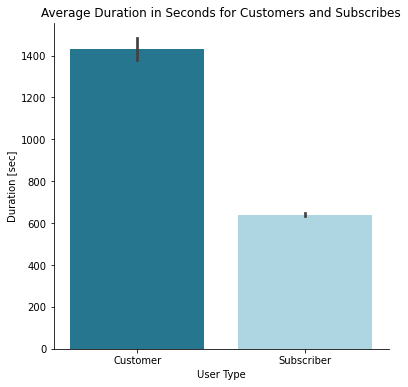

In [51]:
plt.figure(figsize=[6,6])
sns.barplot(data=gobike_clean, x='user_type', y='duration_sec', palette=['#157fa1','#a4daeb'])
plt.xlabel('User Type')
plt.ylabel('Duration [sec]')
plt.title('Average Duration in Seconds for Customers and Subscribes');

In [52]:
gobike_clean.groupby('user_type')['duration_sec'].agg(['mean', 'median'])

,mean,median
user_type,,
Customer,1433.475734,791.0
Subscriber,640.164766,490.0


#### Report
On an average customers or casual riders have more rider time than subscriber, with customers having an average of 1433 seconds and subscribers having an average of 490 seconds.

#### How long does the average trip the different member gender?

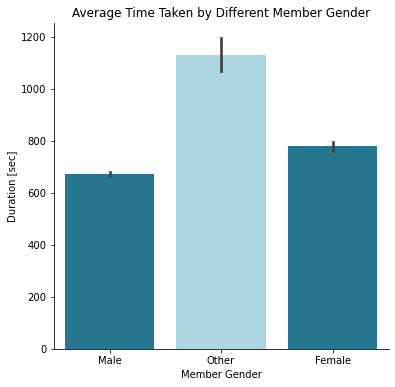

In [53]:
plt.figure(figsize=[6,6])
sns.barplot(data=gobike_clean, x='member_gender', y='duration_sec', palette=['#157fa1','#a4daeb'])
plt.xlabel('Member Gender')
plt.ylabel('Duration [sec]')
plt.title('Average Time Taken by Different Member Gender');

In [54]:
gobike_clean.groupby('member_gender')['duration_sec'].mean()

member_gender
Female     778.872761
Male       672.394851
Other     1130.705877
Name: duration_sec, dtype: float64

#### Report 
Earlier i posed a question since men have the highest ride count does it mean they also spend more time taken riders?. From the visualization the answer is No. We can see that generally spend an average of 672 seconds riding bikes, while women spend about 779 seconds, and Other spend the most time on average with 1131 seconds take rides.

#### Let's Explore some Relationship between `user_type`, `member_gender`,  `period_of_day`,  `day_of_week`, and `bike_share_for_all_trip`.

#### Relationship between `user_type`, `Age_class` and `duration_sec`

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


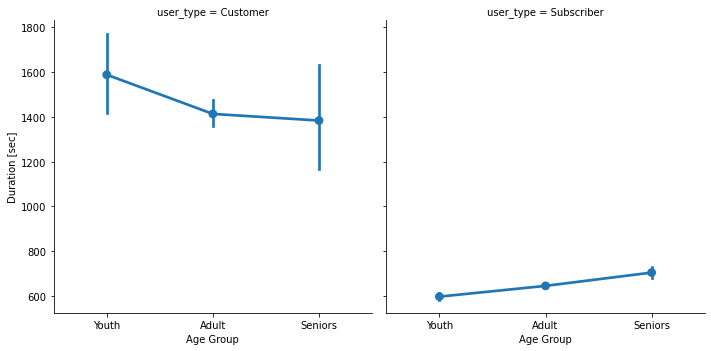

In [55]:
g = sns.FacetGrid(data=gobike_clean, col='user_type', height=5)
g.map(sns.pointplot, 'Age_class','duration_sec')
g.set_xlabels('Age Group')
g.set_ylabels('Duration [sec]')

In [56]:
gobike_clean.groupby(['user_type','Age_class'])['duration_sec'].mean()

user_type   Age_class
Customer    Youth        1588.160034
            Adult        1413.104806
            Seniors      1383.520619
Subscriber  Youth         596.995198
            Adult         645.010383
            Seniors       704.389089
Name: duration_sec, dtype: float64

#### Report
Woe i instantly noticed the linear relationship of Subscriber age group with duration. Form the age group youth there is a gradual increase in duration down to the seniors age group.

#### Relationship between `user_type`, `period_of_day` and `duration_sec`

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


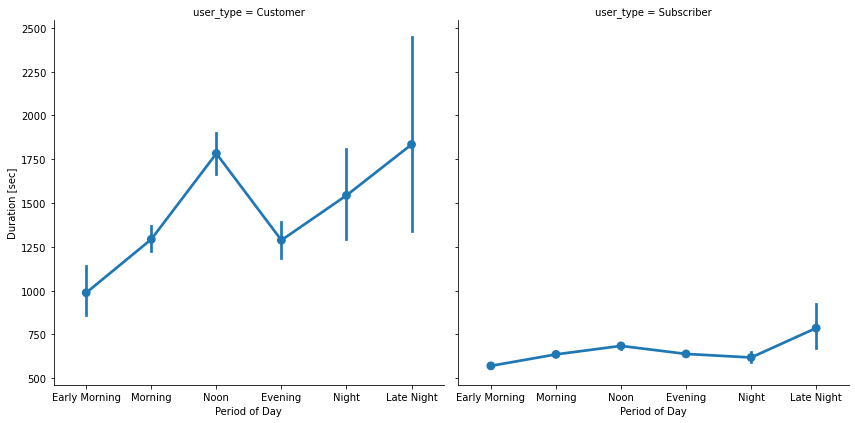

In [57]:
g = sns.FacetGrid(data=gobike_clean, col='user_type', height=6)
g.map(sns.pointplot, 'period_of_day','duration_sec')
g.set_xlabels('Period of Day')
g.set_ylabels('Duration [sec]')

In [58]:
gobike_clean.groupby(['user_type', 'period_of_day'])['duration_sec'].mean()

user_type   period_of_day
Customer    Early Morning     987.992330
            Morning          1293.154459
            Noon             1782.766506
            Evening          1287.924852
            Night            1543.550554
            Late Night       1834.197479
Subscriber  Early Morning     570.733042
            Morning           636.160767
            Noon              684.642534
            Evening           638.832267
            Night             618.509613
            Late Night        786.334824
Name: duration_sec, dtype: float64

#### Report 
The visualization of `user_type`, `period_of_day`, and `duration` i also noticed a trend between `user_type` Customer and `user_tye` Subscriber, that been that the highest average duration of bike ride fell at noon and late night. Notice that even though late night had the least representation by popularity, it has the highest average duration with 1834 for customers and 786 for subscribers. The trend am noticing is that the least represented population have higher average duration of time spent riding.

#### Relationship between `member_gender`, `day_of_week` and `duration_sec`

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


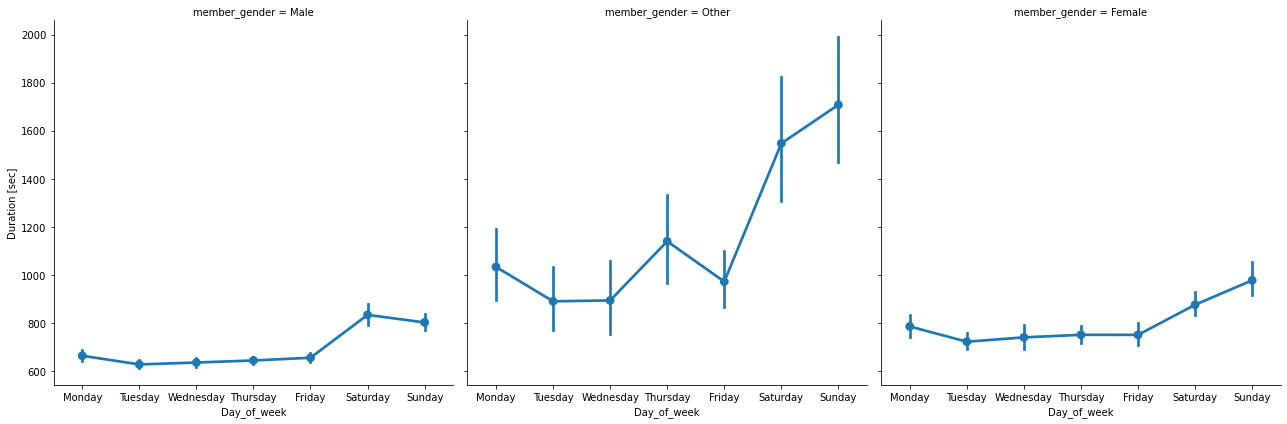

In [59]:
g = sns.FacetGrid(data=gobike_clean, col='member_gender', height=6)
g.map(sns.pointplot, 'day_of_week','duration_sec')
g.set_xlabels('Day_of_week')
g.set_ylabels('Duration [sec]');

In [60]:
gobike_clean.groupby(['member_gender','day_of_week'])['duration_sec'].mean()


member_gender  day_of_week
Female         Monday          785.126680
               Tuesday         721.625844
               Wednesday       739.645865
               Thursday        750.383132
               Friday          750.159980
               Saturday        875.507973
               Sunday          977.237815
Male           Monday          663.207315
               Tuesday         627.142029
               Wednesday       635.010014
               Thursday        643.620405
               Friday          654.846165
               Saturday        833.361307
               Sunday          801.795063
Other          Monday         1032.991770
               Tuesday         889.807277
               Wednesday       893.418722
               Thursday       1139.608577
               Friday          971.683874
               Saturday       1547.112941
               Sunday         1707.706818
Name: duration_sec, dtype: float64

#### Report 
We can see that the least represented population `member_gender` **Other** and `day_of_week` **Saturday** and **Sunday** have the highest average duration with **1547** and **1707** seconds. We can also see that these also applies to other member gender Male and Female on week day Saturday and Sunday.

#### Relationship between `user_type`, `bike_share_for_all_trip` and `duration_sec`

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


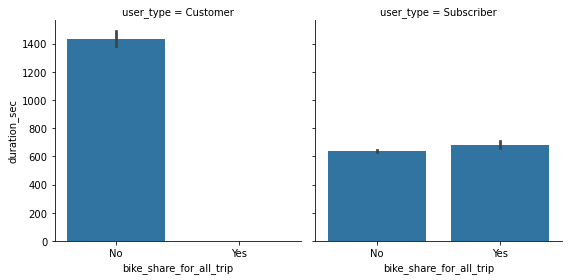

In [61]:
g = sns.FacetGrid(data=gobike_clean, col='user_type', height=4)
g.map(sns.barplot, 'bike_share_for_all_trip','duration_sec')
g.set_xlabels('Bike Share for all Trip')
g.set_ylabels('Duration [sec]');

In [62]:
gobike_clean.groupby(['user_type', 'bike_share_for_all_trip'])['duration_sec'].mean()

user_type   bike_share_for_all_trip
Customer    No                         1433.475734
Subscriber  No                          634.959498
            Yes                         683.997521
Name: duration_sec, dtype: float64

#### Report 
I posed a question when reporting my findings on percentage of riders who share bike?. Are customers allowed to share bikes, or is the right to share bike only given to subcribers?. This visualization answers the question and more. First from the visualization Customers do not share bike, Secondly Customer who do not share bike have an average of about 1400 seconds greater than Suscribers who fall at an average of about 650 seconds.

#### How long does the average trip take for different age class?

<AxesSubplot:xlabel='Age_class', ylabel='duration_sec'>

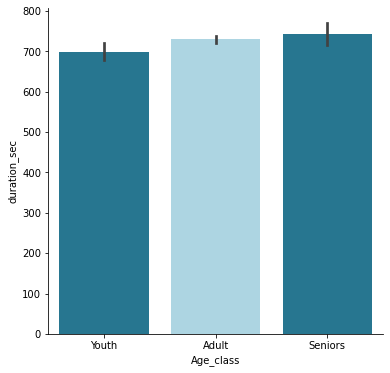

In [63]:
plt.figure(figsize=[6,6])
sns.barplot(data=gobike_clean, x='Age_class', y='duration_sec', palette=['#157fa1','#a4daeb'])
plt.xlabel('Age Group')
plt.title('Bar Plot of Age Group');

#### Report 
From the visualization above we can see that there is little difference in average duration between each age group, with an average corresponding to average total time of all riders 700 seconds. 

### 8.  Which stations are most popular?

In [ ]:
station_start = gobike_clean['start_station_name'].value_counts()
station_start[:10]

In [ ]:
station_start.iloc[-10:]

In [ ]:
station_end = gobike_clean['end_station_name'].value_counts()
station_end[:10]

In [ ]:
station_end[-10:]

In [ ]:
print('Start station: ', len(station_start))
print('End station: ', len(station_end))

In [ ]:
station = {}
for i, row in gobike_clean.iterrows():
    col_name = ['start_station_name', 'end_station_name']
    for col in col_name:
        station_name = row[col]
        if station_name not in station:
            station[station_name] = 1
        else:
            station[station_name] += 1
            

In [ ]:
station = pd.Series(station)
station

In [ ]:
top_stations = station.sort_values()[-10:]

In [ ]:
plt.rcParams['axes.spines.bottom'] = True
plt.barh(top_stations.index, top_stations.values)
for index, values in enumerate(top_stations):
    text = "{}".format(values)
    plt.text(values-400, index, text, va='center',color='white', fontweight='bold')
    
plt.xlabel('Count')
plt.title('Top 10 Stations in the Dataset'); 

### 9. At what point do we need to check or service a bike in the sharing system?

In [ ]:
total_bike_sec = gobike_clean.groupby('bike_id')['duration_sec'].sum().sort_values()
total_bike_sec


In [ ]:
total_bike_sec.describe()

In [ ]:
mean_bike = total_bike_sec.describe()[1]
upper_bond_bike = (total_bike_sec.describe()[-2] - total_bike_sec.describe()[-4]) * 1.5

In [ ]:
plt.plot(total_bike_sec.values)
plt.axhline(mean_bike, color='black', linestyle='-.', linewidth=1, label='Mean')
plt.axhline(upper_bond_bike, color='orange', linestyle='-', linewidth=1, label='Upper bond')
plt.axhspan(0, mean_bike, facecolor='green', alpha=0.3, label='Good Usage')
plt.axhspan(mean_bike, upper_bond_bike, facecolor='yellow', alpha=0.2, label='Moderate Usage')
plt.axhspan(upper_bond_bike,total_bike_sec.max(), facecolor='red', alpha=0.1, label='Heavy Usage')
plt.legend()
plt.ylabel('Duration [sec]')
plt.xlabel('Count')
plt.title('Visual Representation of Bike Usage');

#### Report
This visualization was done to show the usage of bike id's and there total time duration in seconds within the months of Feburary and March 2019. With this graph, stations can determine when a bike should be checked or repaired. The area coloured green represence Good usage, the area coloured yellow represence Moderate bike usage, and the area coloured red represence bikes with heavy usage.

### 10. Heatmap visualization of each cooridinate of bike stations?

In [ ]:
m = folium.Map([37.8272, -122.2913], zoom_start=9)

In [ ]:
coordinate = [tuple(x) for x in gobike_clean[['start_station_latitude', 'start_station_longitude']].to_numpy()]
m.add_child(plugins.HeatMap(coordinate, radius=15))
m

#### Report
From the visualization of the stations geographic location, we can see that stations are majorly seperated into 3 geographical concentration. Feel free to locate the most popular stations.

<a id="conclusions"></a>
## Conclusions

These project has successfully analized different features from the data set. I analized the popularity of different categorical variable with the result been that the most popular:
- Member gender are Males with a popularity of over 70 percent.
- Day of the week is Thursday.
- Hour of the day to start a ride is at 5 pm.
- Period of the day are during evenings.
- Age group are adults.

One relationship i found while investigating this data set is that categories that were least represented had higher average time duration than the most popular categories.


<a id="limitation"></a>
## Project Limitations

These are some limitations that be further reasearched on.

1. No predictive algorithms was used in these project.
2. While clean the missing station names, a better approach could have been implimented by finding the nearest know station cooridinate to that location and then matching the station name to the missing stations, instead i droped all missing values.
3. The project could have explored more goegraphical maps e.g.(visualization of the top 10 stations with custom markers, and the most popular routes to take while taken in ride)


In [ ]:
# The command below will generate the HTML slideshow.
!jupyter nbconvert Main_Project.ipynb --to slides --post serve --no-input --no-prompt

<a id="ref"></a>
## Refrences

- https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib

- https://stackoverflow.com/questions/9957637/how-can-i-set-the-background-color-on-specific-areas-of-a-pyplot-figure